## Pillow
### Darbas su nuotraukomis
***
Dirbsime su python PIL biblioteka. Jeigu neturime instaliuotos PIL bibliotekos reikia jupyter notebook kodo ląstelėje parašyti ir paleisti tokią komandą: `!pip install pillow`
Pradėkime nuo paprasto nuotraukos nuskaitymo ir atvaizdavimo ekrane, panaudodami modulį `Image`, toliau seks įvairūs metodai, darbui su paveikslėlio objektu:

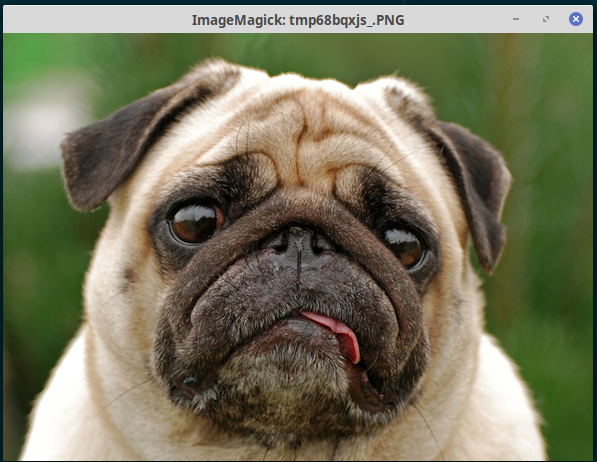

In [44]:
from PIL import Image

im = Image.open('./pics/dog.png')
# display yra jupyter funkcija, o PyCharm'e rašytume im.show() vietoje display(im)
display(im)

### .thumbnail()
***
sukuria miniatiūrą (thumbnail). Metodas išlaiko paveikslėlio proporcijas. Size tuple nurodome kokio dydžio miniatiūros pageidaujame.

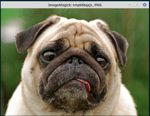

In [45]:
im = Image.open('./pics/dog.png')
size = 150, 150
im.thumbnail(size)
display(im)

### .save() - paveikslėlio išsaugojimas 
***
Panaudoję `.thumbnail()`, pabandome išsaugoti paveikslėlį miniatiūros(300x300) dydžiu, nurodę kitą pavadinimą. Kiekvieną kartą prieš `.thumbnail()` panaudojimą atidarysime paveikslėlį išnaujo, nes šis metodas keičia orginalaus paveikslėlio dydį kintamajame.

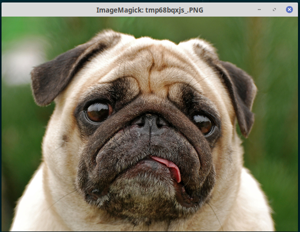

In [46]:
im = Image.open('./pics/dog.png')
size = 300, 300
im.thumbnail(size)
im.save('./pics/300x300_dog.png')
display(im)

Galime pakeisti ne tik dydį, bet ir paveiklėlio tipą, nurodę kitą plėtinį, pvz dabar sukursime 150x150 pikselių dydžio `jpg` tipo paveikslėlį.

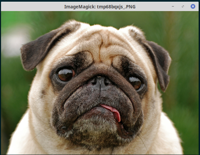

In [47]:
im = Image.open("./pics/dog.png")
size = 200, 200
im.thumbnail(size)
im.save('./pics/200x200_dog.jpg')
display(im)

### Informaciniai atributai .format, .size, .mode
***
Šie atributai suteikia informaciją apie paveikslėlio tipą, dydį pikseliai(taškais) ir panaudotą spalvų modelį(mode) - RGB, RGBA ir pan. Pabandykime nuskaityti šią informaciją iš orginalaus paveikslėlio ir mūsų sukurtų 2-jų miniatiūrų.

In [48]:
im = Image.open('./pics/dog.png')
im2 = Image.open('./pics/300x300_dog.png')
im3 = Image.open('./pics/200x200_dog.jpg')

print(im.format, im.size, im.mode)
print(im2.format, im2.size, im2.mode)
print(im3.format, im3.size, im3.mode)

PNG (597, 462) RGB
PNG (300, 232) RGB
JPEG (200, 155) RGB


### .crop()
***
Padaro iškarpą pagal nurodytas koordinates. Koordinačių sistemos pradžia (0,0) yra paveikslėlio viršutiniame-kairiame kampe. 2 pavyzdžiai, pirmuoju kerpama (0, 0)viršutinis kampas kairėje, (200, 200)apatinis kampas dešinėje, antruoju atvekju kerpama - pagal 2 taškus 100,100 ir 300,300. box kintamajame nurodomos koordinatės, ir jis paduodamas `.crop()` metodui.

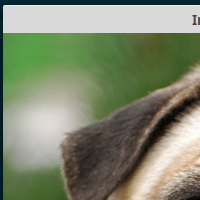

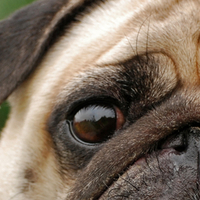

In [49]:
im = Image.open('./pics/dog.png')
box = (0, 0, 200, 200)
region = im.crop(box)
display(region)

box = (100, 100, 300, 300)
region2 = im.crop(box)
display(region2)

### .transpose()
***
Transformuoja paveikslėlį geometriškai, pagal nurodytą parametrą. Galimi parametrai - 
* Image.Transpose.FLIP_LEFT_RIGHT
* Image.Transpose.FLIP_TOP_BOTTOM
* Image.Transpose.ROTATE_90 
* Image.Transpose.ROTATE_180
* Image.Transpose.ROTATE_270
* Image.Transpose.TRANSPOSE

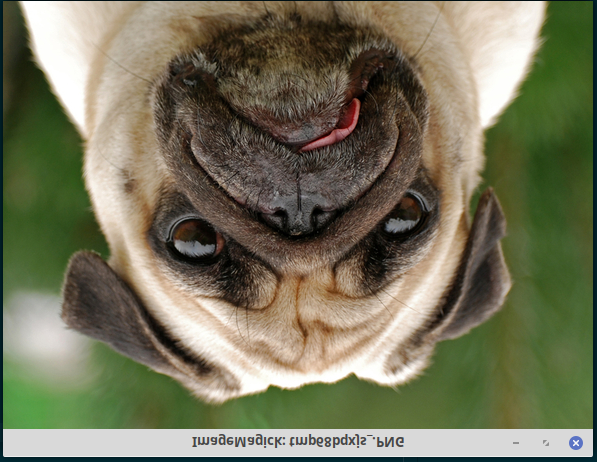

In [50]:
im = Image.open('./pics/dog.png')

tr = im.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
display(tr)

In [ ]:
display(im.transpose(Image.Transpose.FLIP_LEFT_RIGHT))

Pabandykite įvykdyti kitus variantus.

### .resize()
***
pakeičia nuotraukos dydį pagal nurodytas reikšmes.

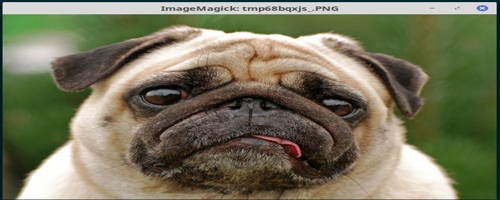

In [51]:
im = Image.open('./pics/dog.png')

size = (500, 200)
resized = im.resize(size)
display(resized)

### .paste()
***
ant nuotraukos uždeda kitą nuotrauką. Tarkime turime logotipą su permatomu fonu:

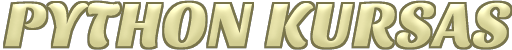

RGBA


In [52]:
logo = Image.open('./pics/logo.png')
display(logo)
print(logo.mode)

Logotipo `.mode` turi rodyti reikšmę RGBA, kur A yra alpha channel, kuris nurodo, koks yra pikselio permatomumas. Sakykime, kad mums reikia pradinės nuotraukos su logo. Panaudojam metodą `.paste()`:


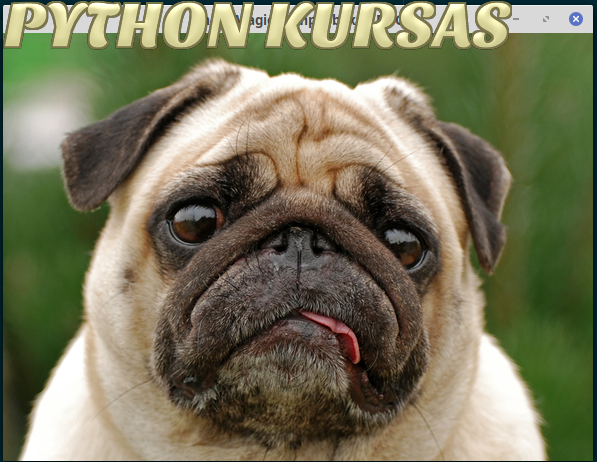

In [53]:
from PIL import Image

im = Image.open('./pics/dog.png')
logo = Image.open('./pics/logo.png')
logo_location = (0, 0, logo.size[0], logo.size[1])
im.paste(logo, logo_location, logo)
display(im)

`.paste()` parametrai:
* logo - mūsų logo
* logo_location - vieta, kur turės būti įklijuotas logo. Svarbu atsiminti, kad vieta turi būti tokio pat dydžio, kaip ir pats logo, todėl sukurtame tuple logo_location naudojame kintamuosius.
* trečias parametras yra Image objektas, kurio alpha channel bus naudojamas kaip kaukė (mask). Šiuo atveju tai yra tas pats logo. Jeigu norėtumėm užklijuoti paprastą nuotrauką ant kitos nuotraukos viršaus, paskutinio parametro naudoti nereikia.

### Filtrai - .filter()
***
Reikės papildomai importuoti ImageFilter modulį. Galimi filtrų variantai: BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE, EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN. Pvz. su BLUR(aštrumo sumažinimo filtru):

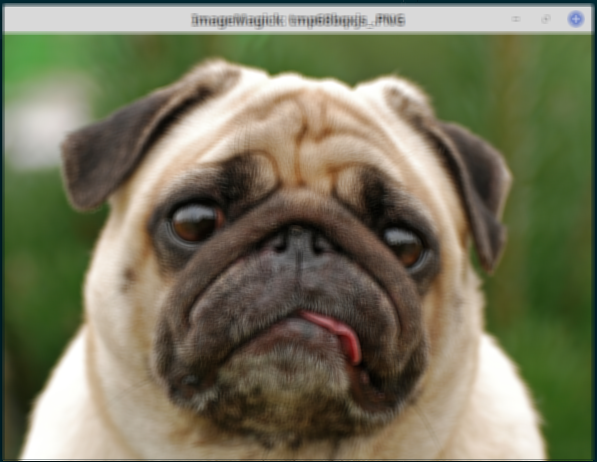

In [54]:
from PIL import Image, ImageFilter

im = Image.open('./pics/dog.png')
im1 = im.filter(ImageFilter.BLUR)
display(im1)

In [55]:
# čia pabandykite kitus filtrus

### .convert()
***
Konverteris tarp "RGB", "RGBA", "L"(juoda-balta), ir daug kitų nuotraukų tipų.

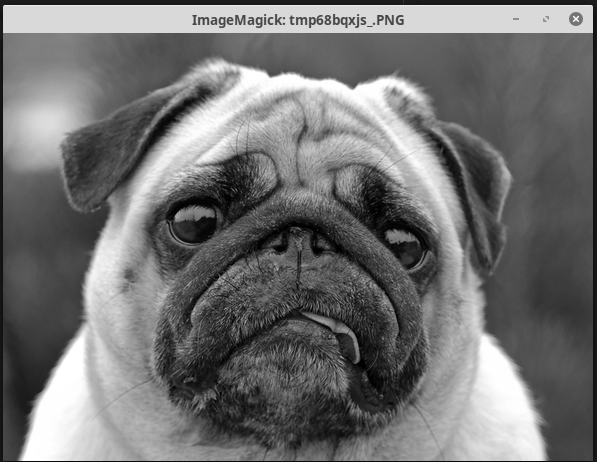

In [56]:
from PIL import Image

im = Image.open('./pics/dog.png')
konvertuotas = im.convert("L")
display(konvertuotas)

### Modulis ImageEnhance
***
Šis modulis skirtas keisti kontrastą(.Contrast), spalvingumą(.Color), aštrumą(.Sharpness), ryškumą(.Brightness). Skaičių skalės vidurys yra 1. Argumentas 1.1 - padidina parametrą 10%, o 0.9 - sumažina 10%.

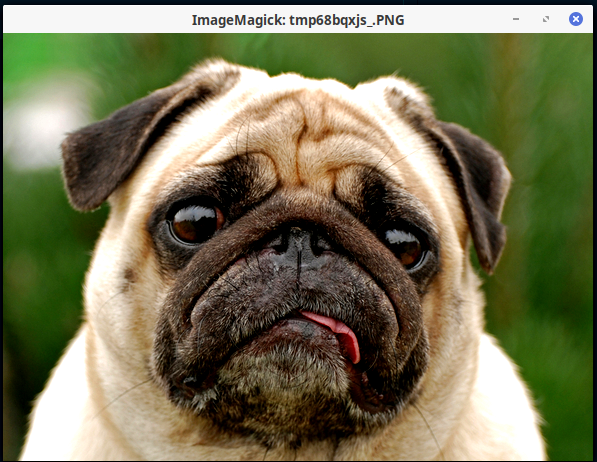

In [57]:
from PIL import Image, ImageEnhance

im = Image.open('./pics/dog.png')
enh = ImageEnhance.Contrast(im)
display(enh.enhance(1.3))
enh.enhance(0.9).save('./pics/kontrast.png')


Kontrastas padidintas 30%.

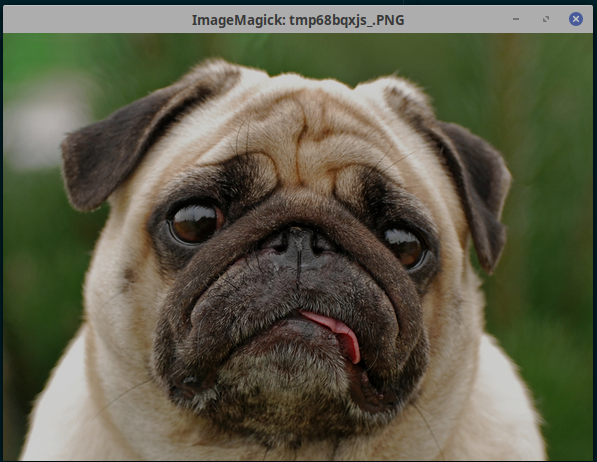

In [58]:
from PIL import Image, ImageEnhance

im = Image.open('./pics/dog.png')
enh = ImageEnhance.Brightness(im)
display(enh.enhance(0.8))

Ryškumas sumažintas 20%.

### .getdata()
***
sukuria objektą, kuriame saugomos visos pikselių reikšmės:

In [59]:
from PIL import Image

im = Image.open('./pics/dog.png')
pixels = im.getdata()

for i in range(5):
    print(pixels[i])

(0, 42, 53)
(0, 41, 52)
(0, 41, 52)
(0, 41, 51)
(0, 41, 51)


### .putdata()
***
leidžia pakeisti paveikslėlio pikselius kitomis reikšmėmis:

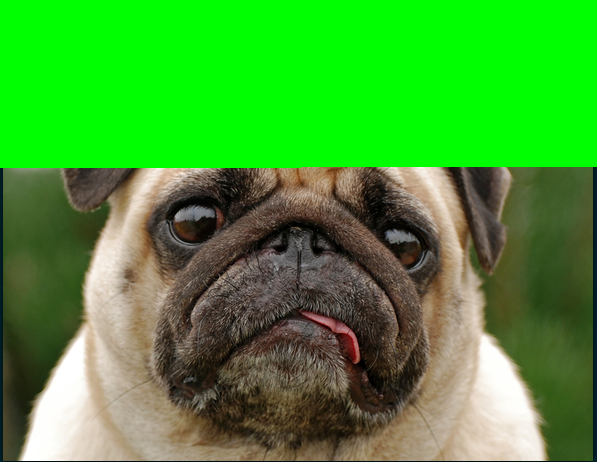

In [60]:
im = Image.open('./pics/dog.png')
naujas_pikselis = (0, 255, 0) # žalios spalvos kodas, vienas pikselis
kaupiklis_naujiems = []
for i in range(100000):
    kaupiklis_naujiems.append(naujas_pikselis)
im.putdata(kaupiklis_naujiems) # uždedam naujus pikselius ant paveikslėlio
display(im)

## pratimas 1
***
Metodų getdata() ir putdata() panaudojimas. Duomenų struktūrų ir for ciklo pasikartojimas.
Sekantis kodas tiesiog sukaupia visus paveikslėlio pikselius formate (R, G, B) į listą nauji_pikseliai. Iš listo galima sudėti pikselius į paveikslėlį, pasitelkime fantaziją, kokiais būdais galėtume pakeisti šiuos pikselius ir juos sudėti į paveikslėlį pakeistus. Pikselio kiekvieno iš 3-jų skaičių reikšmė neturi būti mažesnė nei 0, nei didesnė nei 255. Pakeistus pikselius sudedame į paveikslėlį `.putdata()` metodu.

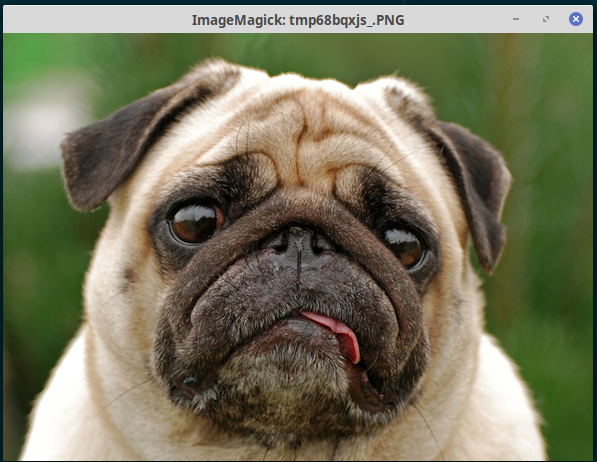

In [40]:
from PIL import Image

im = Image.open('./pics/dog.png')
pixels = im.getdata()
nauji_pikseliai = []
for pixel in pixels:
    naujas_pikselis = pixel[0], pixel[1], pixel[2]
    nauji_pikseliai.append(naujas_pikselis)
im.putdata(nauji_pikseliai) # uždedam naujus pikselius ant paveikslėlio
display(im)

In [42]:
import random